In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt


/tmp/ipykernel_55172/3733293531.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
model = nn.Sequential(
    nn.Linear(8, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 20),
    nn.ReLU(),
    nn.Linear(20, 1),
    nn.Sigmoid()
)

In [3]:
model.load_state_dict(torch.load('trained_model.pth'))

<All keys matched successfully>

In [4]:
df = pd.read_csv('/home/edaerdogan/Desktop/dimuonai/dimuon.csv')
signal_df = df[df['Q1']*df['Q2'] < 0].copy()
background_df = df[df['Q1']*df['Q2'] >= 0].copy()

signal_df['target'] = 0 
background_df['target'] = 1 

df = pd.concat([signal_df, background_df], ignore_index=True)
feature_names = ['pt1', 'pt2', 'eta1', 'eta2', 'phi1', 'phi2', 'Q1', 'Q2']

In [5]:
df[['Q1', 'Q2', 'target']]

,Q1,Q2,target
0,-1,1,0
1,-1,1,0
2,-1,1,0
3,1,-1,0
4,-1,1,0
...,...,...,...
99995,1,1,1
99996,1,1,1
99997,-1,-1,1
99998,1,1,1


<Axes: >

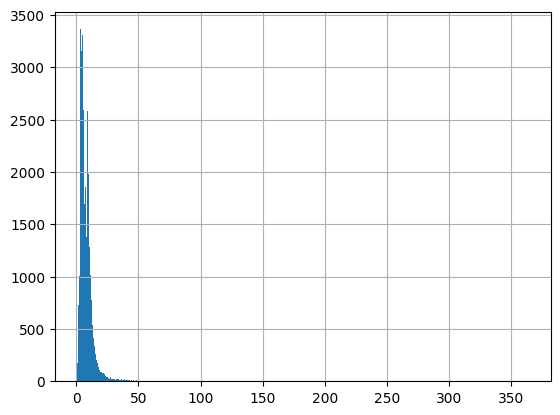

In [6]:
df.pt1.hist(bins='auto') #pt2 df'i??
#plt.xlim(0, 50)
#plt.yscale('log')

In [7]:
#function
def calc_acc(model, df, pt_low, pt_high):
    data = df[(0.5 * (df.pt1+ df.pt2) >= pt_low) & (0.5 * (df.pt1+ df.pt2)<pt_high)]
    x = data[feature_names]
    y = data['target']

    x = torch.tensor(x.values, dtype=torch.float32)
    y = torch.tensor(y.values, dtype=torch.float32).reshape(-1, 1)

    with torch.no_grad():
        y_pred = model(x)
        acc = (y_pred.round() == y).float().mean().numpy().ravel()[0]
    return 0.5*(pt_low + pt_high), acc


In [8]:
calc_acc(model, df, 4, 5)

(4.5, 1.0)

[(1, 11), (2, 12), (3, 13), (4, 14), (5, 15), (6, 16), (7, 17), (8, 18), (9, 19), (10, 20), (11, 21), (12, 22), (13, 23), (14, 24), (15, 25), (16, 26), (17, 27), (18, 28), (19, 29), (20, 30), (21, 31), (22, 32), (23, 33), (24, 34), (25, 35), (26, 36), (27, 37), (28, 38), (29, 39), (30, 40), (31, 41), (32, 42), (33, 43), (34, 44), (35, 45), (36, 46), (37, 47), (38, 48), (39, 49), (40, 50), (41, 51), (42, 52), (43, 53), (44, 54), (45, 55), (46, 56), (47, 57), (48, 58), (49, 59), (50, 60), (51, 61), (52, 62), (53, 63), (54, 64), (55, 65), (56, 66), (57, 67), (58, 68), (59, 69), (60, 70), (61, 71), (62, 72), (63, 73), (64, 74), (65, 75), (66, 76), (67, 77), (68, 78), (69, 79), (70, 80), (71, 81), (72, 82), (73, 83), (74, 84), (75, 85), (76, 86), (77, 87), (78, 88), (79, 89), (80, 90), (81, 91), (82, 92), (83, 93), (84, 94), (85, 95), (86, 96), (87, 97), (88, 98), (89, 99), (90, 100), (91, 101), (92, 102), (93, 103), (94, 104), (95, 105), (96, 106), (97, 107), (98, 108), (99, 109), (100, 11

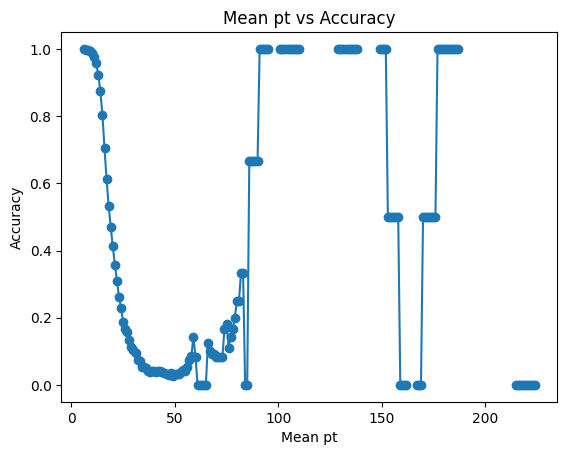

In [19]:
# Loop over pt ranges
pt_ranges = [(i, i+10) for i in range(1, 500)]  # Example: pt ranges from 1 to 10
print(pt_ranges)
mean_pts = [] #store etsin diye iterasyonda tabi ille gerekli değil 
accuracies = []

for pt_range in pt_ranges:
    mean_pt, acc = calc_acc(model, df, *pt_range)
    mean_pts.append(mean_pt)
    accuracies.append(acc)

# Plotting
plt.plot(mean_pts, accuracies, marker='o')
plt.xlabel('Mean pt')
plt.ylabel('Accuracy')
plt.title('Mean pt vs Accuracy')
plt.show()

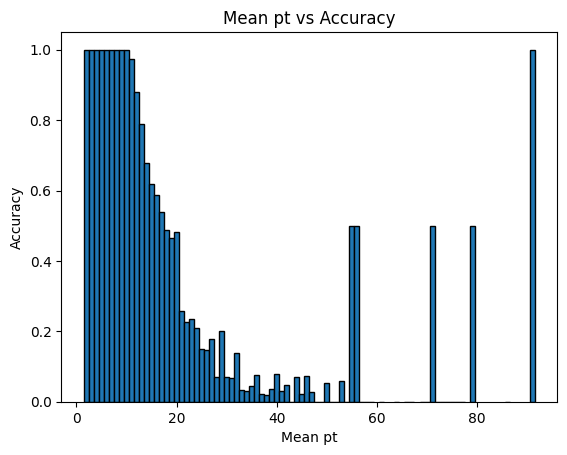

In [10]:
#loop at iki return için ve binleri kullan bu sana mean pt ve acc plotu versin:
# Create bins
bins = np.linspace(1, 100, 100)  #binlerle oynamak lazım

mean_pts = []
accuracies = []

# Loop over bins
for i in range(len(bins)-1):
    pt_low, pt_high = bins[i], bins[i+1]
    mean_pt, acc = calc_acc(model, df, pt_low, pt_high)
    mean_pts.append(mean_pt)
    accuracies.append(acc)

# Plotting
plt.bar(mean_pts, accuracies, width=np.diff(bins), align='edge', edgecolor='black')
plt.xlabel('Mean pt')
plt.ylabel('Accuracy')
plt.title('Mean pt vs Accuracy')
plt.show()

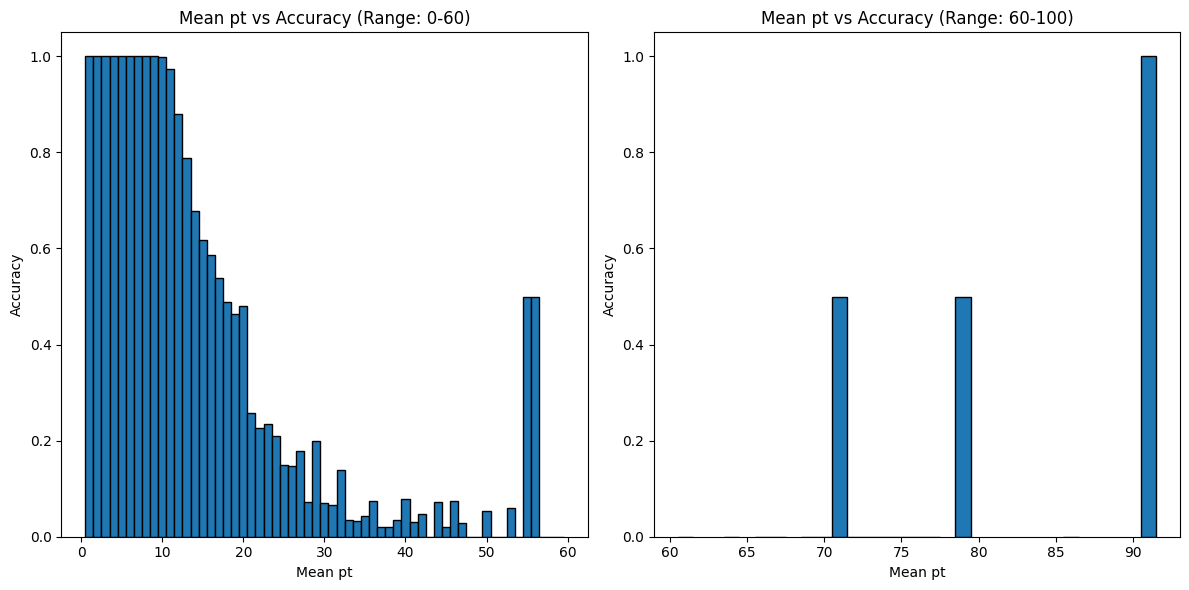

In [11]:
# iki plot versin
bins = np.linspace(0, 100, 101)  
#0-60
mean_pts_0_60 = []
accuracies_0_60 = []

#60-100
mean_pts_60_100 = []
accuracies_60_100 = []

# Loop over bins
for i in range(len(bins)-1):
    pt_low, pt_high = bins[i], bins[i+1]
    mean_pt, acc = calc_acc(model, df, pt_low, pt_high)
    
    # For the range 0-60
    if 0 <= mean_pt <= 60:
        mean_pts_0_60.append(mean_pt)
        accuracies_0_60.append(acc)
    
    # For the range 60-100
    elif 60 < mean_pt <= 100:
        mean_pts_60_100.append(mean_pt)
        accuracies_60_100.append(acc)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
width_0_60 = np.diff(np.concatenate([bins, [bins[-1] + np.diff(bins)[-1]]]))[np.where((mean_pts_0_60 >= bins[0]) & (mean_pts_0_60 <= bins[-1]))] # Computes the upper edge of the last bin by adding the last element of bins to the last element of np.diff(bins) then creates a one-element array containing the calculated upper edge of the last bin.
#to identify the indices corresponding to the bins within the specified range (0-60) np.where
plt.bar(mean_pts_0_60, accuracies_0_60, width=width_0_60, align='edge', edgecolor='black')
plt.xlabel('Mean pt')
plt.ylabel('Accuracy')
plt.title('Mean pt vs Accuracy (Range: 0-60)')

plt.subplot(1, 2, 2)
width_60_100 = np.diff(np.concatenate([bins, [bins[-1] + np.diff(bins)[-1]]]))[np.where((mean_pts_60_100 >= bins[0]) & (mean_pts_60_100 <= bins[-1]))]
plt.bar(mean_pts_60_100, accuracies_60_100, width=width_60_100, align='edge', edgecolor='black')
plt.xlabel('Mean pt')
plt.ylabel('Accuracy')
plt.title('Mean pt vs Accuracy (Range: 60-100)')

plt.tight_layout()
plt.show()


In [12]:
# Loop over bins with debug maybe, ilginç oldu çünkü 10. ve 20.lerden sonra dev düşüş. İlk aldığım nan hatasıyla ilgili olabilir buradakiler de 
for i in range(len(bins)-1):
    pt_low, pt_high = bins[i], bins[i+1]
    mean_pt, acc = calc_acc(model, df, pt_low, pt_high)
    mean_pts.append(mean_pt)
    accuracies.append(acc)
     
    print(f"Bin {i+1}: Mean pt = {mean_pt:.2f}, Accuracy = {acc:.2%}")


Bin 1: Mean pt = 0.50, Accuracy = 100.00%
Bin 2: Mean pt = 1.50, Accuracy = 100.00%
Bin 3: Mean pt = 2.50, Accuracy = 100.00%
Bin 4: Mean pt = 3.50, Accuracy = 100.00%
Bin 5: Mean pt = 4.50, Accuracy = 100.00%
Bin 6: Mean pt = 5.50, Accuracy = 100.00%
Bin 7: Mean pt = 6.50, Accuracy = 100.00%
Bin 8: Mean pt = 7.50, Accuracy = 100.00%
Bin 9: Mean pt = 8.50, Accuracy = 100.00%
Bin 10: Mean pt = 9.50, Accuracy = 99.89%
Bin 11: Mean pt = 10.50, Accuracy = 97.34%
Bin 12: Mean pt = 11.50, Accuracy = 88.04%
Bin 13: Mean pt = 12.50, Accuracy = 78.93%
Bin 14: Mean pt = 13.50, Accuracy = 67.72%
Bin 15: Mean pt = 14.50, Accuracy = 61.77%
Bin 16: Mean pt = 15.50, Accuracy = 58.63%
Bin 17: Mean pt = 16.50, Accuracy = 53.88%
Bin 18: Mean pt = 17.50, Accuracy = 48.84%
Bin 19: Mean pt = 18.50, Accuracy = 46.43%
Bin 20: Mean pt = 19.50, Accuracy = 48.08%
Bin 21: Mean pt = 20.50, Accuracy = 25.76%
Bin 22: Mean pt = 21.50, Accuracy = 22.61%
Bin 23: Mean pt = 22.50, Accuracy = 23.42%
Bin 24: Mean pt = 23.

In [13]:
'''#anlamak için yaptım 
mean_pts_0_60 = np.array([10, 20, 30, 40, 50, 60, 70])
bins = np.linspace(0, 60, 7)

indices = np.where((mean_pts_0_60 >= bins[0]) & (mean_pts_0_60 <= bins[-1]))

print("Mean pts within range 0-60:", mean_pts_0_60[indices])
'''

'#anlamak için yaptım \nmean_pts_0_60 = np.array([10, 20, 30, 40, 50, 60, 70])\nbins = np.linspace(0, 60, 7)\n\nindices = np.where((mean_pts_0_60 >= bins[0]) & (mean_pts_0_60 <= bins[-1]))\n\nprint("Mean pts within range 0-60:", mean_pts_0_60[indices])\n'